# **Exploration of the model of Solow**

Olivier Pannekoucke 
INPT-ENM / CNRM / CERFACS

<h3 style="font-variant:small-caps;"><center>Abstract</center></h3>

<div style="margin:0 50px 0 50px">
<div style="background:rgb(230,230,255)">

    
In this lecture we introduce the Solow model of growth that studies the growth of the economy by capital accumulation. 

After a derivation of the dynamics of capital, a numerical exploration illustrates the time evolution of the economy. While the economy is exponentially growing, per capita values show a convergence of the economy toward a limit capital per capita, and show that Solow model is not able to reproduce long term growth of economy as observed from the data.

However, exogenous modeling of innovation illustrates how Solow's model can be modified to account for complex economic processes.
    
    
 </div>
<b>keywords</b>: <i> Solow model, growth dynamics, exogenous modelling, innovation  </i>
</div>




##  **1. Macro-economic model of equilibrium : circular flow of income**

<figure>
<center>
<img src="./img/solow.png" width="500"/>
    <figcaption>
        Fig. 1: Illustration of circular flow income model
        </figcaption>    
    </center>
    </figure>

**Macro economics quantities**

 * **$Y$**  Gross Domestic Production (GDP)
 * **$C$**  Consumption
 * **$S$**  Saving
 * **$I$**  Investment
 
**Economic agents**

 * Households
 * Firms
 
**Equilibrium for the households**

$$Y=C+S$$

**Equilibrium of the firms**

$$Y=C+I$$

## **2. Solow growth model**

### **2.1 Assumptions**

**Macro-economics quantities**

- The population size of workers is denoted by $L$, and is assumed to represent a fixed fraction of the total population size $N$ which growth at a rate $n$,
- Production function : $Y_t = F(L_t,K_t)$ "explains" the national income from the work and the capital.
- The saving is $S(Y_t)= s Y_t$ equal to the investment $I_t$ ,
- The capital $K_t$ (buildings, cars,..) measures the wealth of the country
- the capital can decrease along the time at a rate of deprecition of capital $\delta$
- la consommation $C_t$ se déduit du PIB

The production function is often assumed **homogeneous function of degree one** i.e. 
$$\forall \lambda, F(\lambda K,\lambda L)=\lambda F(K,L),$$
which can be understood as follows: a copy of a company ($\lambda=2$) will lead to double to total output $2F(K,L)$ while it can be seen as a doubling of the initial values $F(2K,2L)$ (note: this is not strictly true because some services can be mutualized).

**Wadge and interest rate**

The factors of production -- capital and labor -- are used to produce in a typical firm. The profit of the firm is written
In the case where the population is both employed and has capital invested, then the total income corresponds to the GDP. 
 
To do this, it is sufficient to determine the remuneration of labor ($w$) and capital ($r$) that allows us to **maximize the profit of firms** which reads as 
$$\Pi(K,L) = Y(K,L) - wL -r K.$$
The first order conditions for profit maximization are then written as 
$$
\left\{
\begin{array}{l}
\partial_K \Pi = 0,\\
\partial_L \Pi = 0.
\end{array}\right.
$$
leading to the values of wage and interest rate which read as 
$$
\left\{
\begin{array}{l}
r = \partial_K Y(K,L),\\
w = \partial_L Y(K,L).
\end{array}\right.
$$

***Comment : clarification of money in the circular diagram Fig.1**:*

This detail of the labor return (the wage) and the capital return (the rate of capital) gives a better description of the flow of money shown on the Fig. 1, where the yield of the production (that only goes toward the factor market) has to be separated with one part toward the factor market (the wage corresponding to the return of labor) and another toward through the goods and services market then the financial market) toward the households.

**An example of production function : Cobb-Douglas**

$$Y = F(L,K)=A K^\alpha L^{1-\alpha}$$ 
where
$A$ is the **total factor productivity** which corresponds to the level of technology.

In the case of the Cobb-Douglas function, the firm's profit is written 
$$\Pi = AK^\alpha L^{1-\alpha} - wL -r K,$$
which leads to the following quantities:

 * The **rate of return of capital** is given by $$r_t = \partial _K F(K,L) = \alpha \frac{Y}{K}.$$
 * The **wage rate** corresponding to the wage, is defined as $$w_t = \partial _L F(K,L) = (1-\alpha) \frac{Y}{L}.$$

such that total labor income $wL=(1-\alpha)Y$ and total capital income $rK=\alpha Y$ lead to a total compensation of $(1-\alpha)Y+\alpha Y = Y$.

### **2.2 Dynamics**

**Householder : dynamics of the population**

$${\dot L} = n L$$

**Dynamics of the capital**
$$\dot K  = I_t -\delta K,$$


**Solow growth model**


The resulting model reads as 


\begin{equation}
(1)\qquad
\left\{\begin{array}{l}
 \dot K = s Y - \delta K,\\
 Y = A K^\alpha L^{1-\alpha},\\
\dot L = n L.
\end{array}\right.
\end{equation}

or 

\begin{equation}
(1)\qquad
\left\{\begin{array}{l}
 \dot K = s A K^\alpha L^{1-\alpha} - \delta K,\\
\dot L = n L.
\end{array}\right.
\end{equation}

For numerical exploration, $\alpha$ is often set to $\alpha=1/3$.


### **2.3 Numerical exploration**

#### **2.3.1 Code**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympkf

In [2]:
class Solow(sympkf.Model):
    r"""
    Macro Economic model as defined by the Solow
    """
    def __init__(self, s=0.1, α=0.33 , A=1., δ=0.1, n=0.01, g=0.0, **kwargs):
        super().__init__(**kwargs)
        self.s = s # saving ratio 
        self.A = A # Total factor of production in Cobb-Douglas GDP formula
        self.δ = δ # depreciation rate of capital
        self.α = α # GDP-capital elasticity
        self.n = n # Population growth rate
        self.g = g # impact of innovation 
        # Important supplementary quantities
        self.effective_depreciation = self.n + self.δ
        self.kstar = (self.s*self.A/(self.n+self.δ))**(1/(1-self.α)) # limit capital per capita
        
    def trend(self, t, state):
        r"""
        Trend for the Solow model
        
        K : capital
        L : labour
        E : innovation due to technical progress
        
        """
        K, L, E = state
        Y = self.GDP(state)
        dK = self.s * self.A * K**self.α * (E*L)**(1-self.α) - self.δ*K
        dL = self.n * L
        dE = self.g * E
        return np.array([dK, dL, dE])
    
    def GDP(self, state):
        K, L , E = state
        return self.A*K**self.α * (E*L)**(1.-self.α)
    
    def wage(self,state):
        ''' wage due to houseolds for the labor '''
        K, L, E = state
        return self.A*(1-self.α)(K/L)**self.α*E**(1.-self.α)
    
    def capital_return(self, state):
        K, L, E = state
        return self.A*self.α*K**(self.α-1.)*(E*L)**(1.-self.α)
        
    def plot(self, traj):
        r"""        
        Time series for K,L,..
        """
        times = [key for key in traj]
        times.sort()
        
        K = [traj[time][0] for time in times]
        L = [traj[time][1] for time in times]
        E = [traj[time][2] for time in times]
        
        plt.plot(times, K, label='K')
        plt.plot(times, L, label='L')
        plt.plot(times, E, label='E')
        
        # Diagnostique
        Y = [self.A*k**self.α*(e*l)**(1-self.α) for k,l,e in zip(K,L,E)]
        C = [(1-self.s)*y for y in Y]
        I = [self.s*y for y in Y] # Save == Investment
        plt.plot(times, Y, label='GDP (Y)')
        plt.plot(times, C, label='Consumption (C)')
        plt.plot(times, I, label='Investment (I)')
        
        plt.legend()
        
    def plot_normalise(self,traj, label=None):
        times = [key for key in traj]
        times.sort()
        
        K = [traj[time][0] for time in times]
        L = [traj[time][1] for time in times]
        
        # Capital par tête
        k = np.asarray([k/l for k,l in zip(K,L)])
        plt.plot(times, k/self.kstar, label=label)
        plt.xlabel('t')
        plt.ylabel('Capital per capita normalized by $k^*$')

#### **2.3.2 Numerical experiment**

In [3]:
macro = Solow()
macro.set_dt(1)
time_window = macro.window(100)

In [4]:
%%time
K0, L0, E0 = 1., 1., 1.
state0 = np.array([K0, L0, E0])
traj = macro.forecast(time_window, state0)

CPU times: user 5.5 ms, sys: 140 µs, total: 5.64 ms
Wall time: 5.5 ms


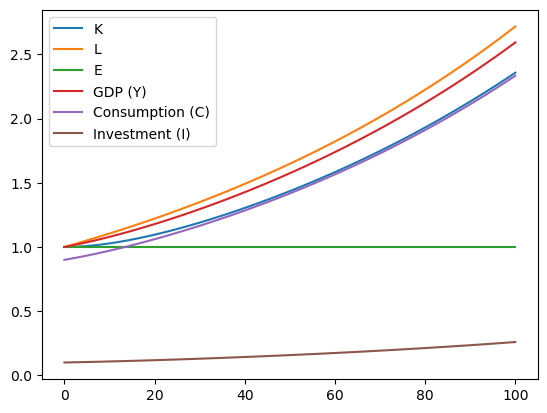

In [5]:
macro.plot(traj)

**Conclusion**
 
 * We observe a growth of capital 
 * But since the population is also growing, it does not means that the economy is growing
 * It is then interesting to evaluate the distribution of wealth.
 
 We now introduce ***per capita* (by head) value of variables**

### **2.4 Economical analysis of the Solow dynamics : Evolution of the economy by head == per capita**

#### **2.4.1 Evolution of the per capita wealth**

 **per capita** values are a way to quantify the effective wealth by person. For instance, we introduce the following quantities
 
 * $y=\frac{Y}{L}$ output per capita (GDP by head)
 * $k=\frac{K}{L}$ capital per capita (capital by head)
 
 Of course, the capital per capita is not strictly representative of reality, because there are inequalities, but it is an indicator of effective wealth.
 
 **Example: what is the dynamics of (fix)  capital in growing population ?**
 
 If we consider an economy where the capital $K$ is constant, says $K_0$, while the population is growing at a rate $n$, that is $L(t)=e^{nt}L_0$, then the wealth by head, $k=K/L$ reads as 
 $$k = \frac{K_0}{L_0} e^{-nt} = e^{-nt} k_0,$$
 where $k_0=K_0/L_0$, whose dynamics is
 $$\dot k = -n k.$$
 
 Population growth implies a decrease in per capita wealth. 

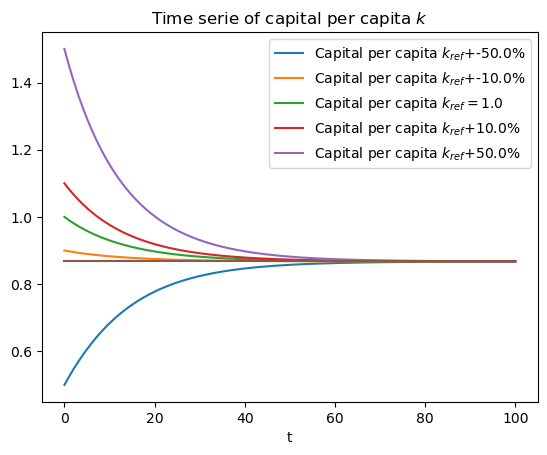

In [6]:
# Time evolution of capital per capita 
K0r, L0, E0 = 1., 1., 1.
for deltaK in [-0.5,-0.1,0, 0.1, 0.5]:
    K0 = K0r*(1+deltaK)
    k0 = K0/L0
    state0 = np.array([K0, L0, E0])
    traj = macro.forecast(time_window, state0)

    times = [t for t in traj]
    times.sort()
    k = [traj[t][0]/traj[t][1] for t in times]
    if K0==K0r:
        label = 'Capital per capita $k_{ref}=$'+f'{K0r}'
    else:
        label = 'Capital per capita $k_{ref}$+'+f'{deltaK*100}%'
    plt.plot(times, k, label=label)
plt.plot([times[q] for q in [0,-1]], 2*[macro.kstar])
plt.legend()
plt.xlabel('t')
plt.title("Time serie of capital per capita $k$");

**Conclusion**

 * For Solow model of growth, we observe a convergence of the capital per capita toward a limit, $k^\star$, that does not depends of the initial wealth.

#### **2.4.2 Analytical characterization of the convergence toward a limit of per capita wealth**

Because the output $Y=F(K,L)$ is a homogeneous function of degree one ($\forall \lambda, F(\lambda K,\lambda L)=\lambda F(K,L)$), e.g. the Cobb-Douglas production function, then it can be shown that the dynamics of capital per capita reads as 
$$(2)\qquad\dot k = sf(k) - (n+\delta) k,$$

where $y=f(k)= F(\frac{K}{L},1)$ it the ouput by capita. For the Cobb-Douglas production function, this reads as $y = A k^\alpha$.

 * The growth of capital per capita comes from the investment per capita $sf(k)$,
 * while the effective decrease of capital per capita commes from the cumulative effect of the depreciation of capital and the growth of the population, $(\delta+n)k$ 

The limit corresponds to the locus of $\dot k =0$, that is the crossing point of the investment per capita by the effective depreciation of capital per capita, i.e. when 

$$sf(k^\star)=(\delta+n)k^\star.$$

that can be illustrated from a plot.

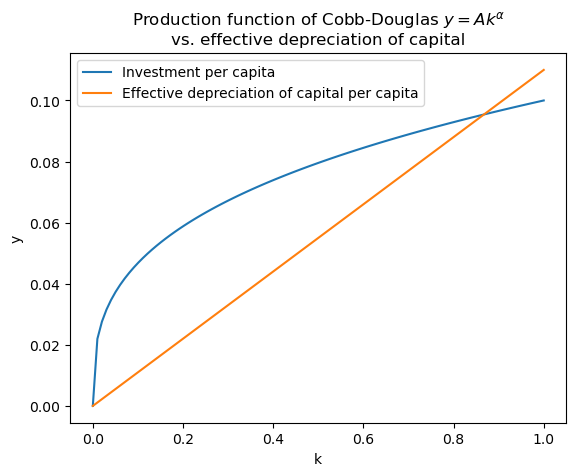

In [7]:
k = np.linspace(0,1,100)
plt.plot(k, macro.s*macro.A*k**macro.α, label='Investment per capita')
plt.plot(k, (macro.δ+macro.n)*k,label='Effective depreciation of capital per capita')
plt.xlabel('k')
plt.ylabel('y')
plt.legend()
plt.title('Production function of Cobb-Douglas $y = A k^\\alpha$\nvs. effective depreciation of capital');

Equilibrium as solution of $\dot k=0$ is given by
$$k_\infty= \left(\frac{sA}{n+\delta}\right)^{\frac{1}{1-\alpha}}.$$

In [8]:
k_inf = (macro.s*macro.A/(macro.n+macro.δ))**(1/(1-macro.α))
k_inf

0.8674009089254503

**Discussion from the optimal capital limit**

 * We observe that the population growth rate and the depreciation rate of capital play a symmetric role, which damp the optimal value of capital when the rates are increasing (from exogenous reasons).
 * The optimal capital increases with 
   * an exogenous increase of the technology i.e. when $A$ increases, 
   * an exogenous increase of the saving rate (or a decrease of the consumption).

**Sensitivity of the convergence of economy depending on the initial wealth**


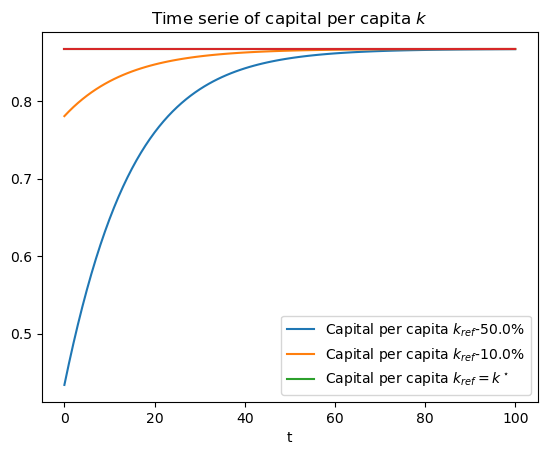

In [9]:
# Time evolution of capital per capita 
K0r, L0, E0 = macro.kstar, 1., 1.
for deltaK in [-0.5,-0.1,0]:
    K0 = K0r*(1+deltaK)
    k0 = K0/L0
    state0 = np.array([K0, L0, E0])
    traj = macro.forecast(time_window, state0)

    times = [t for t in traj]
    times.sort()
    k = [traj[t][0]/traj[t][1] for t in times]
    if K0==K0r:
        label = 'Capital per capita $k_{ref}=k^\star$'
    else:
        label = 'Capital per capita $k_{ref}$'+f'{deltaK*100}%'
    plt.plot(times, k, label=label)
plt.plot([times[q] for q in [0,-1]], 2*[macro.kstar])
plt.legend()
plt.xlabel('t')
plt.title("Time serie of capital per capita $k$");

**Conclusion**

 * The convergence toward the limit capital is not the same depending on the initial value of capital:
 * An economy starting from an initial capital much lower than $50\%$ of the optimal limit, increases faster then the behaviour of a much richer economy: after 20 years, the increase of the poor initial economy is larger than $33\%$ of $k^\star$, while it is less than $10\%$ for the richer's one.

### **2.5 Results from Solow growth model**


**Conclusion**

 * Solow's growth model, through capital accumulation, predicts a convergence of the economy towards an equilibrium,
 * There is therefore no long term growth in Solow's model,
 * The data on GDP indicate long term growth.
 
**Perspectives** 

 * How does Solow's model analyze a real economy?
 * Where does the long-term growth that is not represented in the Solow model come from? 

**Comment** 

 Solow model can help to diagnose an exogeneous evolution of the technologie or the innovation. 
 
 For the Cobb-Douglas production function written as $Y= K^\alpha (AL)^{1-\alpha}$, when $A$ is a function of time, then
 
 $$\frac{dY}{Y} = \alpha \frac{dK}{K} + (1-\alpha) \frac{dL}{L} + (1-\alpha) \frac{dA}{A}, $$
of in term of trend
 $$\frac{\partial_t Y}{Y} = \alpha \frac{\partial_t K}{K} + (1-\alpha) \frac{\partial_t L}{L} + (1-\alpha)\frac{\partial_t A}{A}, $$
where the part of the ouput due to the innovation/technology improvement can be quantified from numbers as 
 $$SR(t)= \frac{\partial_t A}{A} = \frac{1}{1-\alpha}\left[\frac{\partial_t Y}{Y} - \alpha \frac{\partial_t K}{K} - (1-\alpha) \frac{\partial_t L}{L}\right], $$
 which is the Solow residual (SR), that can be computed from the data *e.g.* by considering the linear regression 
 $$ \ln \Delta Y = \alpha \ln \Delta K + (1-\alpha) \ln \Delta L + SR(t),$$
 where the value of $\alpha$ is decuded from the data.
 
 Solow residual is the part of the growth that can not be explained by the part due to the capital and the labor.

## **3. Improvement of the Solow model by modelling innovations**

### **3.1 Introduction of an exogeneous growth of innovation**

What is important, is that Solow model can be improved e.g. by taking into account an exogeneous modelling of the innovation.

If the innovation implies an exponential growth of the production factor $A$, then it means that it is governed by a dynamics that would reads as 
$$\dot A = gA.$$
The resulting improved Solow model reads as 

\begin{equation}
(1)\qquad
\left\{\begin{array}{l}
 \dot K = s K^\alpha (AL)^{1-\alpha} - \delta K,\\
\dot L = n L,\\
\dot A = g A.
\end{array}\right.
\end{equation}

### **3.2 Numerical exploration of the modified Solow model**

In [10]:
modified_macro = Solow(g=0.01)

In [11]:
%%time
K0, L0, E0 = 1., 1., 1.
state0 = np.array([K0, L0, E0])
traj = modified_macro.forecast(time_window, state0)

CPU times: user 5.52 ms, sys: 0 ns, total: 5.52 ms
Wall time: 5.5 ms


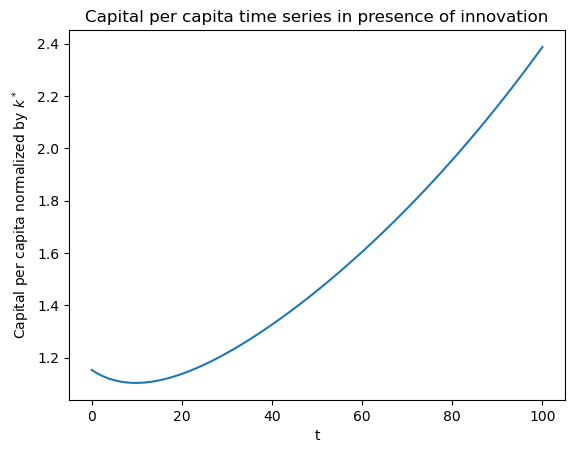

In [12]:
macro.plot_normalise(traj)
plt.title('Capital per capita time series in presence of innovation');

**Conclusion**

 * As it is expected, increase of the innovation implies a long term growth of the economy
 
**Perspectives**

 * The modeling of innovation growth being exogenous, it would be desirable to explain its origin.
 * This can be explained by the improvement of the technology, but also to the education that improves the skill of workers

## **4. Conclusion**

* Solow model provides dynamical equations of the capital as a measure of the economy wealth.
* Growth of economy from accumulation of capital converges toward an equilibrium == no long terme growth of the economy

**How to explain growth ?**

* Innovation can be modellized within the improvement of the technology through the production factor $A$

**How to account for climate change impact on the economy ?**

* Following the an equivalent modelling than the one introducing the innovation, it is possible to introduce a modulation of the profuction function to account of the damage due to the climate change when greenhouse gas concentration increases.

see Nordhaus DICE model.. 



## References

 * R. M. Solow, “A Contribution to the Theory of Economic Growth,” The Quarterly Journal of Economics, vol. 70, no. 1, p. 65, Feb. 1956, doi: 10.2307/1884513.
 * W. D. Nordhaus, “An Optimal Transition Path for Controlling Greenhouse Gases,” Science, vol. 258, no. 5086, pp. 1315–1319, 1992, Accessed: 2022-07-20. [Online]. Available: http://www.jstor.org/stable/2880417
 * Nobel prize of Economy 2018 scientific background, [“Economic Growth, Technological Change, And Climate Change: Scientific Background.” 2018.](https://www.nobelprize.org/uploads/2018/10/advanced-economicsciencesprize2018.pdf)